<a href="https://colab.research.google.com/github/harshr-r/AIML-2025/blob/main/Lab-5_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Registration with Titancic data set

##import packages and datasets

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns
%matplotlib inline
from google.colab import files

In [28]:
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [29]:
df=pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [31]:
d=df.describe(percentiles=[.5,.75,.9])
d

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
90%,3.000000,1.000000,50.000000,1.000000,2.000000,78.050820,297.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [32]:
df.columns, df.columns[0]

(Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'),
 'pclass')

In [33]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

##exploaratory analysis and plots

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

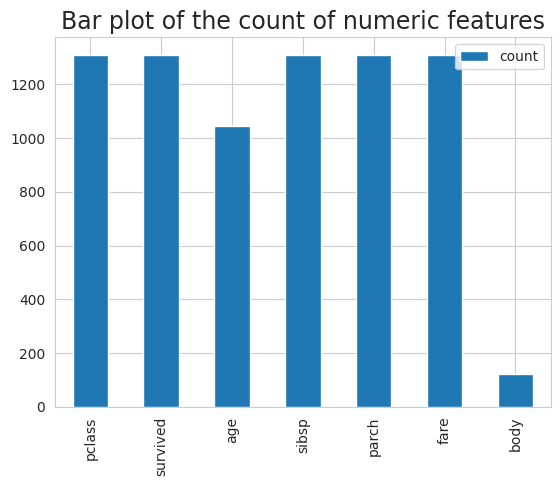

In [34]:
dT=d.T
dT.plot.bar(y='count')
pit.title("Bar plot of the count of numeric features",fontsize=17)

#check the relative size of survived and non-survived

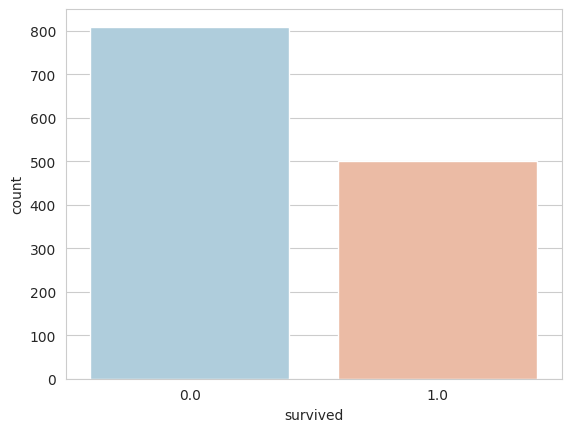

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='survived', data=df, palette='RdBu_r', legend=False)
pit.show()

**is there a pattern for the survivability based on sex?**

it looks like more females survied than males

<Axes: xlabel='survived', ylabel='count'>

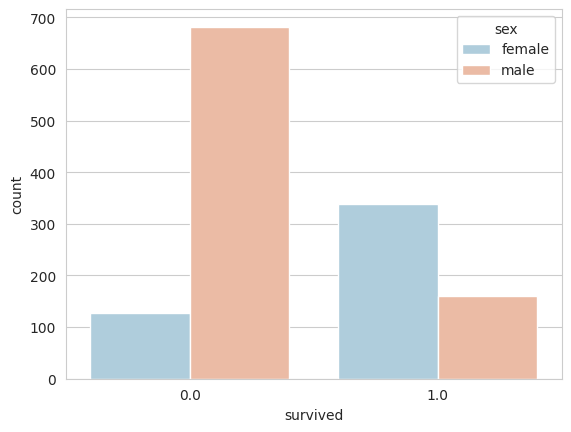

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='sex',data=df,palette='RdBu_r')

**What about any pattern related to passenger class**

it look like disproportional large number odf 3rd class passengers died!

<Axes: xlabel='survived', ylabel='count'>

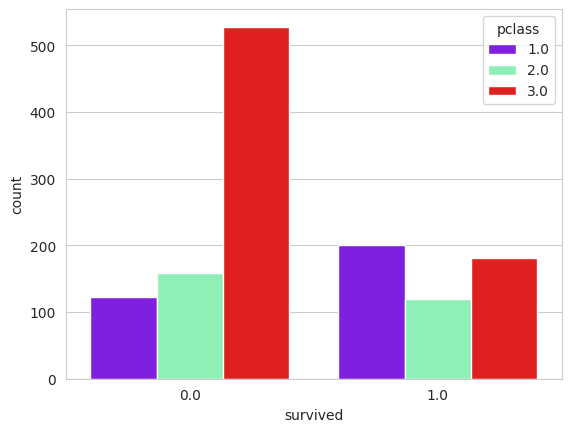

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='pclass',data=df,palette='rainbow')

**Following codes extract and plots the fraction of passenger count that survived by each class**

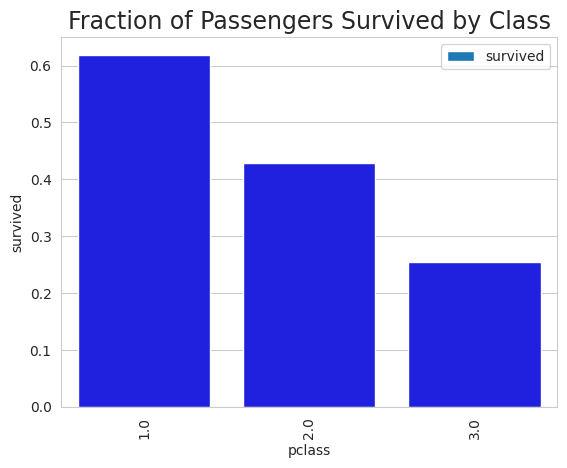

In [48]:
# Group by 'pclass' to get the mean survival rate for each class
f_class_survived = df.groupby('pclass')['survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived

# Bar plot for fraction of passengers survived by class
f_class_survived.plot.bar(y='survived')
pit.title("Fraction of Passengers Survived by Class", fontsize=17)

# Change made here: Removed palette and used color for a single color scheme
sns.set_style('whitegrid')
sns.barplot(x=f_class_survived.index, y=f_class_survived['survived'], color='blue')  # Changed here
pit.title("Fraction of Passengers Survived by Class", fontsize=17)
pit.show()

Text(0.5, 0, 'Passenger class')

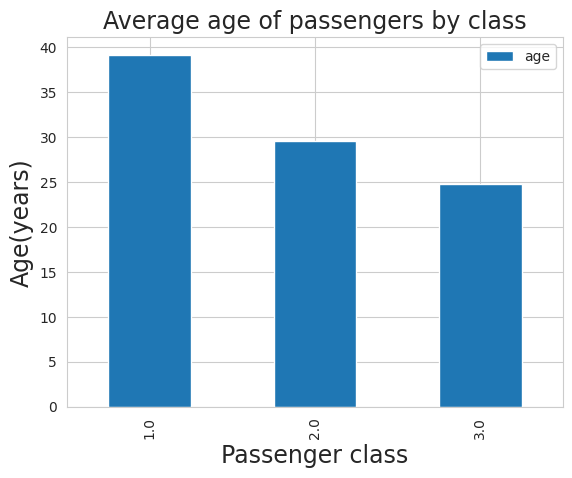

In [49]:
f_class_Age=df.groupby('pclass')['age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='age')
pit.title("Average age of passengers by class",fontsize=17)
pit.ylabel("Age(years)",fontsize=17)
pit.xlabel("Passenger class",fontsize=17)

# Define a function to impute(fill up missing values) age feature

In [54]:
# Update to use iloc for positional indexing
a = list(f_class_Age['age'])

def impute_age(cols):
    age = cols.iloc[0]  # Access age using iloc
    pclass = cols.iloc[1]  # Access pclass using iloc
    if pd.isnull(age):
        if pclass == 1:
            return a[0]
        elif pclass == 2:
            return a[1]
        else:
            return a[2]
    else:
        return age

Apply the above defined function and plot the count of numeric features

Text(0.5, 1.0, 'Barplot of the count of numeric features')

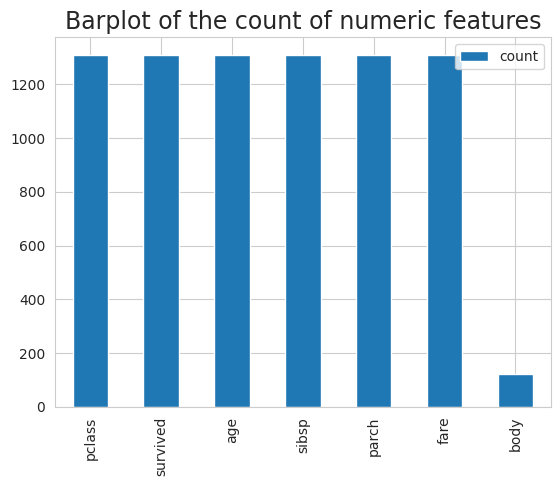

In [56]:
# Apply impute_age function to fill missing ages
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

# Recheck summary statistics after imputing age
d = df.describe()
dT = d.T
dT.plot.bar(y='count')
pit.title("Barplot of the count of numeric features", fontsize=17)

Drop the cabin feature and any other null value

In [57]:
df.drop('cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest


##Drop other unessary feature

In [58]:
df.drop(['name','ticket'],axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest


##convert categorial feature like sex

**use pandas 'get_dummies()' function**

In [59]:
sex=pd.get_dummies(df['sex'],drop_first=True)
embark=pd.get_dummies(df['embarked'],drop_first=True)

**Now drop the sex and embarked coloums and concatenate the new dummy variables


In [60]:
df.drop(['sex','embarked'],axis=1,inplace=True)
df=pd.concat([df,sex,embark],axis=1)
df.head()

,pclass,survived,age,sibsp,parch,fare,boat,body,home.dest
